# Assignment 4. Sentiment analysis using recurrent neural networks

Full instructions on completion of this assignment can be found in Canvas. 

## 1. Theoretical part


### 1.1 Vanishing gradient problem

What is the vanishing / exploiding gradient problem in Elman recurrent neural networks? Write down update equations for Elman RNN and explain what is causing the vanishing / exploiding gradient issue.

 - Gradients **vanish** (*explode*) exponentially across time steps when the recurrent connection is **<1** (*>1*)
 - Problem is connected to the fact that it is always the same connection weight. And on every step we multiply this matrix by itself => 
 - In the same way a product of n real numbers can **shrink to zero ( vanishing  gradient)** or *explode to infinity (exploiding gradient)*, so does this product of matrices

 Simple recurrent networds (Elman quations)
 $$h_{t}=\sigma_{h}\left(W_{h} x_{t}+U_{h} h_{t-1}+b_{h}\right) \\
y_{t}=\sigma_{y}\left(W_{y} h_{t}+b_{y}\right)$$

let use one more notation for understanding:
$$
L=\sum_{t} L_{t}(y_{t}), \hat{x_{t}}=W_{h} x_{t}+U_{h} h_{t-1}+b_{h} \text { and } \varepsilon_{t}(\hat{x_{t}})=L_{t}(\sigma_{y}(W_{y} \sigma_{h}(\hat{x_{t}})+b_{y})) \to L=\sum_{t} L_{t}(y_{t}) = \sum_{t} \varepsilon_{t}(\hat{x_{t}})
$$


let's consider gradients: [material](http://proceedings.mlr.press/v28/pascanu13.pdf)
$$
\begin{array}{c}
{\frac{\partial \mathcal{E}}{\partial \theta}=\sum_{1 \leq t \leq T} \frac{\partial \mathcal{E}_{t}}{\partial \theta}} \\
{\frac{\partial \mathcal{E}_{t}}{\partial \theta}=\sum_{1 \leq k \leq t}\left(\frac{\partial \mathcal{E}_{t}}{\partial \hat{x_{t}}} \frac{\partial \hat{x_{t}}}{\partial \hat{x_{t}}} \frac{\partial^{+} \hat{x_{t}}}{\partial \theta}\right)}
\end{array}
$$

The next equation transport the error “in time“ from step t back to step k.
$$
\frac{\partial \hat{x}_{t}}{\partial \hat{x}_{k}}=\prod_{t \geq i>k} \frac{\partial \hat{x}_{i}}{\partial \hat{x}_{i-1}}=\prod_{t \geq i>k} \mathbf{U}_{h}^{T} \operatorname{diag}\left(\sigma_{h}^{\prime}\left(\hat{x}_{i-1}\right)\right)
$$

this result for nonlinear functions $\sigma$ where $|\sigma^{\prime}(\hat{x})$| is bounded: $|\operatorname{diag}\left(\sigma^{\prime}\left(\mathbf{x}_{k}\right)\right)| \leq \gamma$

it is sufficient for $\lambda_1<\frac{1}{γ}$ , where $\lambda_1$ is the largest singular value of $U_{h}$, for the vanishing gradient problem to occur.

Proof:
$$
\forall k,\left\|\frac{\partial \hat{x}_{k+1}}{\partial \hat{x}_{k}}\right\| \leq\left\|\mathbf{U}_{h}^{T}\right\|\left\|\operatorname{diag}\left(\sigma^{\prime}\left(\hat{x}_{k}\right)\right)\right\|<\frac{1}{\gamma} \gamma<1 \to
\left\|\frac{\partial \hat{x}_{k+1}}{\partial \hat{x}_{k}}\right\| \leq \mu < 1
$$

$$
\Rightarrow\left\|\frac{\partial \varepsilon_{t}}{\partial \theta} \frac{\partial \hat{x}_{t}}{\partial \hat{x}_{k}}\right\|=\left\|\frac{\partial \varepsilon_{t}}{\partial \hat{x}_{t}} \prod_{t \geq i>k} \frac{\partial \hat{x}_{i}}{\partial \hat{x}_{i-1}}\right\| \leq\left\|\frac{\partial \varepsilon_{t}}{\partial \hat{x}_{t}}\right\| \mu^{t-k}
$$
Consequently, $t-k \to \infty$ and  $it \to 0$

How does LSTM help prevent the vanishing (and exploding) gradient problem in a recurrent neural network? Write down the equations of LSTM and explain how technically this schema is better than the Elman recurrent neural networks.

In theory, classic (or "vanilla") RNNs can keep track of arbitrary long-term dependencies in the input sequences. The problem of vanilla RNNs is computational (or practical) in nature: when training a vanilla RNN using back-propagation, the gradients which are back-propagated can "vanish" (that is they can tend to zero) or "explode" (that is, they can tend to infinity), because of the computations involved in the process, which use finite-precision numbers. RNNs using LSTM units partially solve the vanishing gradient problem, because LSTM units allow gradients to also flow unchanged. However, LSTM networks can still suffer from the exploding gradient problem. 
[material](https://en.wikipedia.org/wiki/Long_short-term_memory)

$$
\begin{array}{l}
{f_{t}=\sigma_{g}\left(W_{f} x_{t}+U_{f} h_{t-1}+b_{f}\right)} \\
{i_{t}=\sigma_{g}\left(W_{i} x_{t}+U_{i} h_{t-1}+b_{i}\right)} \\
{o_{t}=\sigma_{g}\left(W_{o} x_{t}+U_{o} h_{t-1}+b_{o}\right)} \\
{c_{t}=f_{t} \circ c_{t-1}+i_{t} \circ \sigma_{c}\left(W_{c} x_{t}+U_{c} h_{t-1}+b_{c}\right)} \\
{h_{t}=o_{t} \circ \sigma_{h}\left(c_{t}\right)}
\end{array}
$$
where 
- $x_{t}$: input vector to the LSTM unit
- $f_{t}$: forget gate's activation vector
- $i_{t}$: input/update gate's activation vector
- $o_{t}$: output gate's activation vector
- $h_{t}$: hidden state vector also known as output vector of the LSTM unit
- $c_{t}$: cell state vector
- $W \in R^{hxd}$, $U \in R^{hxh}$and $b \in R^{h}$: weight matrices and bias vector parameters which need to be learned during training

$\sigma _{g}$: sigmoid function.
$\sigma _{c}$ and $\sigma _{h}$: hyperbolic tangent function.

“**long short-term memory**”: standard NNs have
- long-term memory in the weights
- short-term memory in the activations
- LSTM mixes both notions


- **Gate**: pointwise multiplication regulates how much is passed through,
based on inputs
- Internal state serves as a memory
- Recurrent connection of weight 1: error can flow across time steps
without vanishing or exploding

The LSTM architecture makes it easier for the RNN to preserve information over many timesteps
- e.g. if the forget gate is set to remember everything on every timestep, then the info in the cell is preserved indefinitely 
- By contrast, it's harder for vanilla RNN to learn a recurrent weight matrix $\mathrm{W}_{\mathrm{h}}$ that preserves info in hidden state

- LSTM doesn't guarantee that there is no vanishing/exploding gradient, but it does provide an easier way for the model to learn long-distance dependencies


## 2. Practical part

### 2.1 Use LSTM and word embeddings for text classification 

Implement a text classifier based on Bi-LSTM network. Use hidden state(s) to represent an input text document.

If you use ``torch`` use the ``torch.nn.Embedding`` to load pre-trained word embeddings. Use the [GloVe](http://nlp.stanford.edu/data/wordvecs/glove.6B.zip) embeddings in the input layer of your network.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%matplotlib inline
%cd /content/gdrive/My Drive/Colab Notebooks
# %mkdir DL_project
# %mkdir dataset

%cd /content/gdrive/My Drive/NLP
%cd SkolTech/hw4

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/NLP
/content/gdrive/My Drive/NLP/SkolTech/hw4


In [0]:
import pandas as pd
import numpy as np 
import re
from tqdm import tqdm_notebook
import string
from scipy.sparse import csr_matrix, hstack, issparse, coo_matrix
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

In [0]:
def read_data(path):
    data_path = '../FILIMDB/'
    data_path += path
    data= []
    with open(data_path) as file:
        for line in file:
            data.append(line.strip())
    return data

In [0]:
train_texts, test_texts, dev_texts = read_data('train.texts'),read_data('test.texts'),read_data('dev.texts')
dev_b_texts, test_b_texts = read_data('dev-b.texts'),read_data('test-b.texts')
train_labels , dev_labels, dev_b_labels =  read_data('train.labels'), read_data('dev.labels'), read_data('dev-b.labels')


In [0]:
stopwords_eng = set(["them", "she", "wasn", "wasn't", "having", "ll", "hadn", "nor", "why", "these", "she's", "both", "you're", "an", "between", "myself", "because", "being", "ve", "while", "over", "whom", "isn", "shouldn", "wouldn't", "been", "d", "themselves", "does", "most", "below", "his", "you'll", "further", "there", "was", "ain", "doesn't", "each", "couldn", "which", "that'll", "down", "won't", "than", "y", "should've", "have", "until", "their", "through", "ma", "before", "is", "yours", "so", "up", "hasn", "doesn", "him", "very", "if", "mustn", "or", "it's", "too", "re", "mustn't", "as", "now", "isn't", "mightn't", "those", "other", "above", "who", "do", "the", "wouldn", "some", "this", "for", "don", "me", "any", "what", "theirs", "weren't", "mightn", "aren", "ours", "your", "didn't", "shan", "shouldn't", "off", "has", "just", "himself", "herself", "m", "we", "by", "aren't", "yourselves", "again", "after", "you've", "you", "how", "such", "can", "o", "were", "not", "they", "out", "few", "with", "i", "be", "haven't", "are", "s", "hadn't", "had", "our", "don't", "in", "needn't", "but", "during", "weren", "it", "will", "a", "did", "of", "shan't", "ourselves", "and", "no", "doing", "yourself", "at", "then", "you'd", "he", "once", "about", "where", "more", "only", "into", "same", "my", "hers", "t", "when", "its", "own", "here", "all", "won", "needn", "under", "br", "that", "couldn't", "from", "against", "itself", "am", "should", "her", "on", "to", "didn", "haven", "hasn't","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "you're", "you've", "you'll", "you'd", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "she's", "her", "hers", "herself", "it", "it's", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "that'll", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "don't", "should", "should've", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "aren't", "couldn", "couldn't", "didn", "didn't", "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't", "isn", "isn't", "ma", "mightn", "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't", "shouldn", "shouldn't", "wasn", "wasn't", "weren", "weren't", "won", "won't", "wouldn", "wouldn't", "br"])
def preprocess(text,stop_words=False,punctuation=False, lower=True):
    """
    Preprocess the data
    
    stop_words: flag to remove stopwords
    punctuation: flag to remove punctuation
    """
    new_text = []
    for num,value in enumerate(text):
        if lower:
            value = value.lower()
        
        for char in set(string.punctuation):
            value = value.replace(char," "+char+" ")

        if stop_words:
            pp = " ".join([word for word in value.split() if word not in stopwords_eng])
            if punctuation:
                punctn = string.punctuation+'…–—‘“‚„«»'
                pp = pp.translate(str.maketrans('', '',punctn ))
                new_text.append(" ".join(pp.split()))
            else:
                new_text.append(pp)
        else:
            new_text.append(" ".join(value.split())) # remove multiple spaces
             
        
    return new_text

In [0]:
def ngrams(words, gram_range):
    pp = []
    for igram in range(gram_range[0],gram_range[1]+1):
        for i in range(len(words)-igram+1):
            pp.append(" ".join(words[i:i+igram]))
            
    return pp

In [0]:
def tokenization_gram(text,gram_range = (1,1)):
    
    return [ngrams(line.split(),gram_range=gram_range) for line in text]

In [0]:
train_texts = preprocess(train_texts, punctuation=True)
test_texts = preprocess(test_texts, punctuation=True)
dev_texts = preprocess(dev_texts, punctuation=True)

dev_b_texts = preprocess(dev_b_texts, punctuation=True)
test_b_texts = preprocess(test_b_texts, punctuation=True)

train_texts_tok_all = tokenization_gram(train_texts,gram_range = (1,1))
dev_texts_tok_all = tokenization_gram(dev_texts,gram_range = (1,1))
dev_b_texts_tok_all = tokenization_gram(dev_b_texts,gram_range = (1,1))

test_texts_tok_all = tokenization_gram(test_texts,gram_range = (1,1))
test_b_texts_tok_all = tokenization_gram(test_b_texts,gram_range = (1,1))

In [0]:
train_texts = preprocess(train_texts, stop_words=True,punctuation=True)
test_texts = preprocess(test_texts, stop_words=True,punctuation=True)
dev_texts = preprocess(dev_texts, stop_words=True,punctuation=True)

dev_b_texts = preprocess(dev_b_texts, stop_words=True,punctuation=True)
test_b_texts = preprocess(test_b_texts, stop_words=True,punctuation=True)

train_texts_tok = tokenization_gram(train_texts,gram_range = (1,1))
dev_texts_tok = tokenization_gram(dev_texts,gram_range = (1,1))
dev_b_texts_tok = tokenization_gram(dev_b_texts,gram_range = (1,1))

test_texts_tok = tokenization_gram(test_texts,gram_range = (1,1))
test_b_texts_tok = tokenization_gram(test_b_texts,gram_range = (1,1))

In [0]:
y_train = np.array([1 if label == 'pos' else 0 for label in train_labels ])
y_dev = np.array([1 if label == 'pos' else 0 for label in dev_labels ])
y_dev_b = np.array([1 if label == 'pos' else 0 for label in dev_b_labels ])

In [0]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories=[range(2)], sparse=False)
y_enc_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_enc_dev = encoder.fit_transform(y_dev.reshape(-1, 1))
y_enc_dev_b = encoder.fit_transform(y_dev_b.reshape(-1, 1))

In [0]:
def make_vocab_ngram(text, mode='ber',gram_range=(1,1), min_cnt=0):
    vocab = dict()
    
    if mode == 'ber':    
        for line in text:
            for word in set(ngrams(line,gram_range)):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
    else:
        for line in text:
            for word in ngrams(line,gram_range):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
                    
    if min_cnt:
        new_dict = dict()
        for key,val in vocab.items():
            if val > min_cnt:
                new_dict[key] = val
        vocab = new_dict
    return vocab

In [0]:
dict_train = make_vocab_ngram(train_texts_tok,mode='any')
dict_train_all = make_vocab_ngram(train_texts_tok_all,mode='any')

In [0]:
vocab_train = set(dict_train.keys())
vocab_train_all = set(dict_train_all.keys())

Here we load the embeddings and transform the vocabulary so that it includes only words that occur in the data and for which embeddings exist:

In [0]:
# load the embeddings
def load_embeddings(emb_path, vocab):
    clf_embeddings = {}
    emb_vocab = set()
    for line in open(emb_path):
        line = line.strip('\n').split()
        word, emb = line[0], line[1:]
        emb = [float(e) for e in emb]
        if word in vocab:
            clf_embeddings[word] = emb
    for w in vocab:
        if w in clf_embeddings:
            emb_vocab.add(w)
    word2idx = {w: idx for (idx, w) in enumerate(emb_vocab)}
    max_val = max(word2idx.values())
    
    word2idx['UNK'] = max_val + 1
    word2idx['EOS'] = max_val + 2
    emb_dim = len(list(clf_embeddings.values())[0])
    clf_embeddings['UNK'] = [0.0 for i in range(emb_dim)]
    clf_embeddings['EOS'] = [0.0 for i in range(emb_dim)]
    
    embeddings = [[] for i in range(len(word2idx))]
    for w in word2idx:
        embeddings[word2idx[w]] = clf_embeddings[w]
    embeddings = torch.Tensor(embeddings)
    return embeddings, word2idx

In [0]:
from torchtext.vocab import Vectors
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
embeddings, vocab_train = load_embeddings('glove.6B.300d.txt', vocab_train)
embeddings_all, vocab_train_all = load_embeddings('glove.6B.300d.txt', vocab_train_all)

Let us check the lengths of sentences in the dataset:

Average Train text length:  122.3508


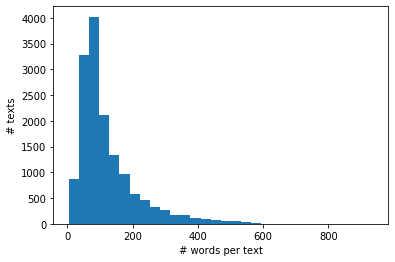

In [0]:
txt_lengths = [len(t) for t in train_texts_tok] 
print('Average Train text length: ', np.average(txt_lengths))
p = plt.hist(txt_lengths, bins=30)
l = plt.xlabel('# words per text')
l = plt.ylabel('# texts')

We need to transform a list of lines of different lengths to a matrix which can be used as an input to a neural network.

We pad the shorter lines with EOS symbol to match the length of the longest line in a batch:

In [0]:
def to_matrix(lines, vocab, max_len=None, dtype='int32'):
    """Casts a list of lines into a matrix"""
    pad = vocab['EOS']
    max_len = max_len or max(map(len, lines))
    lines_ix = np.zeros([len(lines), max_len], dtype) + pad
    for i in range(len(lines)):
        line_ix = [vocab.get(l, vocab['UNK']) for l in lines[i]]
        lines_ix[i, :len(line_ix)] = line_ix
    lines_ix = torch.LongTensor(lines_ix)
    return lines_ix

In [0]:
dummy_lines = [
    ['one'],
    ['one', 'two'],
    ['the', 'long', 'line'],
    ['unkn0wn', 'w0rds']
]
print(to_matrix(dummy_lines, vocab_train_all))

tensor([[43970, 52262, 52262],
        [43970, 32754, 52262],
        [ 4785,  7374, 25853],
        [52261, 52261, 52262]])


In [57]:
print(to_matrix(dummy_lines, vocab_train))

tensor([[43824, 52085, 52085],
        [43824, 32635, 52085],
        [ 4763,  7345, 25758],
        [52084, 52084, 52085]])


Generate the train/validation/test partition:

In [0]:
def generate_data(train_tok,vocab,label_enc=None,with_label=True):
    data = []
    if with_label:
        for t, l in zip(train_tok,label_enc):
            t = to_matrix([t], vocab)
            l = torch.Tensor([l])
            data.append((t, l))
    else:
        for t in train_tok:
            t = to_matrix([t], vocab)
            data.append(t)
    return data

In [0]:
train_data = generate_data(train_texts_tok,label_enc=y_enc_train, vocab=vocab_train)
dev_data = generate_data(dev_texts_tok,label_enc=y_enc_dev, vocab=vocab_train)
dev_b_data = generate_data(dev_b_texts_tok,label_enc=y_enc_dev_b, vocab=vocab_train)
# test_data = to_matrix()

train_data_all = generate_data(train_texts_tok_all,label_enc=y_enc_train, vocab=vocab_train_all)
dev_data_all = generate_data(dev_texts_tok_all,label_enc=y_enc_dev, vocab=vocab_train_all)
dev_b_data_all = generate_data(dev_b_texts_tok_all,label_enc=y_enc_dev_b, vocab=vocab_train_all)
# test_data_all = to_matrix()

<a id='model_description'></a>
### Model

Let us now define our model. It will consist of:
- an embedding layer which will use pre-trained GloVe embeddings with no fine-tuning
- a layer of LSTM cells
- a dense layer that will convert the LSTM output to scores of labels

In [0]:
class BiLSTM(nn.Module):
    def __init__(self, embeddings, hidden_dim=128, lstm_layer=1, output=2):
        
        super(BiLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        
        # load pre-trained embeddings
        self.embedding = nn.Embedding.from_pretrained(embeddings)
        # embeddings are not fine-tuned
        self.embedding.weight.requires_grad = False
        
        # RNN layer with LSTM cells
        self.lstm = nn.LSTM(input_size=self.embedding.embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=lstm_layer, 
                            bidirectional=True)
        # dense layer
        self.linear = nn.Linear(hidden_dim*2, hidden_dim)
        self.output = nn.Linear(hidden_dim, output)

    
    def forward(self, sents):
        x = self.embedding(sents)
        
        # the original dimensions of torch LSTM's output are: (seq_len, batch, num_directions * hidden_size)
        lstm_out, _ = self.lstm(x)
        
        # reshape to get the tensor of dimensions (seq_len, batch, num_directions, hidden_size)
        lstm_out = lstm_out.view(x.shape[0], -1, 2, self.hidden_dim)#.squeeze(1)
        
        # lstm_out[:, :, 0, :] -- output of the forward LSTM
        # lstm_out[:, :, 1, :] -- output of the backward LSTM
        # we take the last hidden state of the forward LSTM and the first hidden state of the backward LSTM
        dense_input = torch.cat((lstm_out[-1, :, 0, :], lstm_out[0, :, 1, :]), dim=1)
        
        # y = self.output(dense_input).view([1, 2])

        output = self.linear(dense_input)
        y = self.output(output).view([1, 2])
        return y

Let us initialise the model, optimiser, and loss:

In [0]:
hidden_dim = 128
layers = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BiLSTM(embeddings, hidden_dim, lstm_layer=layers)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()


model = model.to(device)
criterion = criterion.to(device)

Check the number of trainable parameters in the model:

In [0]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 473,474 trainable parameters


Besides loss, we also need a metric which is interpretable by humans. We will use accuracy:

In [0]:
def binary_accuracy(preds, y):
    # y is either [0, 1] or [1, 0]
    # get the class (0 or 1)
    y = torch.argmax(y, dim=1)
    
    # get the predicted class
    preds = torch.argmax(torch.sigmoid(preds), dim=1)
    
    correct = (preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc

<a id='model_training'></a>
### Training of a model

The procedure to perform one epoch of training:

In [0]:
def train(model, train_data, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model to the training mode
    model.train(mode=True)
    
    for t, l in train_data:
        # reshape the data to n_words x batch_size (here batch_size=1)
        t = t.view((-1, 1))
        # transfer the data to GPU to make it accessible for the model and the loss
        t = t.to(device)
        l = l.to(device)
        
        # set all gradients to zero
        optimizer.zero_grad()
        
        # forward pass of training
        # compute predictions with current parameters
        predictions = model(t)
        # compute the loss
        loss = criterion(predictions, l)
        # compute the accuracy (this is only for report)
        acc = binary_accuracy(predictions, l)
        
        # backward pass (fully handled by pytorch)
        loss.backward()
        # update all parameters according to their gradients
        optimizer.step()
        
        # data for report
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(train_data), epoch_acc / len(train_data)

The evaluation procedure computes loss and accuracy, but does not update gradients:

In [0]:
def evaluate(model, test_data, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for t, l in test_data:
            t = t.view((-1, 1))
            t = t.to(device)
            l = l.to(device)
            predictions = model(t)
            
            loss = criterion(predictions, l)
            acc = binary_accuracy(predictions, l)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(test_data), epoch_acc / len(test_data)

In [0]:
def predict(model, test_data):
    model.eval()

    y_pred_all = np.array([])

    for t in test_data:
        t = t.view((-1, 1))
        t = t.to(device)

        predictions = model(t)

        y_pred_all =  np.append(y_pred_all,np.argmax(predictions.cpu().detach().numpy(),axis=1))
    
    return y_pred_all

Procedure to compute the time between *start_time* and *end_time* points (we'll use it to note the time during training):

In [0]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

Run training and evaluation for several epochs:

In [0]:
hidden_dim = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BiLSTM(embeddings, hidden_dim, lstm_layer=1)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.BCEWithLogitsLoss()


model = model.to(device)
criterion = criterion.to(device)

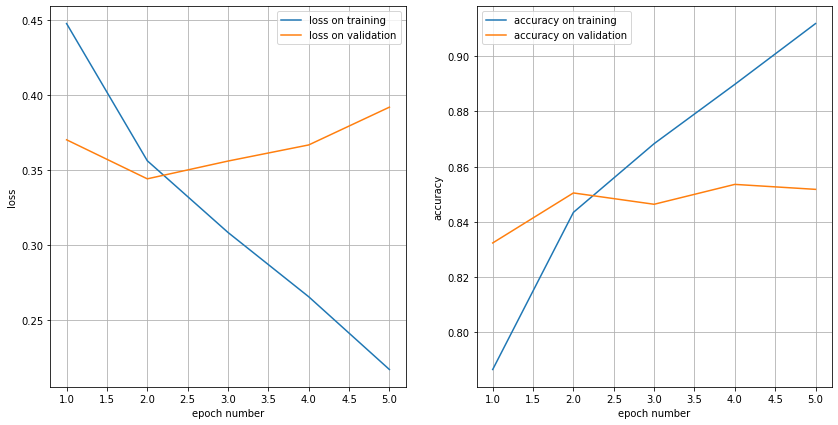

Epoch: 05 | Epoch Time: 2m 45s
	Train Loss: 0.217 | Train Acc: 91.18%
	 Val. Loss: 0.392 |  Val. Acc: 85.18%


In [0]:
N_EPOCHS = 5

best_valid_loss = float('inf')

train_loss_history = []
valid_loss_history = []

train_acc_history = []
valid_acc_history = []

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_data, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, dev_data, criterion)
    
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    valid_loss_history.append(valid_loss)
    valid_acc_history.append(valid_acc)
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'bilstm-model.pt')

    clear_output(True)
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.plot(np.arange(len(train_loss_history)) + 1, train_loss_history, label='loss on training')
    plt.plot(np.arange(len(valid_loss_history)) + 1, valid_loss_history, label='loss on validation')
    plt.ylabel('loss')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.plot(np.arange(len(train_acc_history)) + 1, train_acc_history, label='accuracy on training')
    plt.plot(np.arange(len(valid_acc_history)) + 1, valid_acc_history, label='accuracy on validation')
    plt.ylabel('accuracy')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()
    plt.show()

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

### 2.2 Use LSTM and ELMo for text classification

Use ``allennlp`` and the model ``elmo_2x2048_256_2048cnn_1xhighway_weights`` which is the model used in week5 seminar to build a text classification system. The only difference from the previous point is the use of ELMo contextualized word embeddings. Do not use any additional dependencies or versions of the ELMo model. Make sure that the model is located in the same directory with the classification Python script.

In [58]:
!pip install allennlp

     |████████████████████████████████| 7.6MB 44.9MB/s 
     |████████████████████████████████| 133kB 45.4MB/s 
     |████████████████████████████████| 256kB 58.6MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 245kB 58.6MB/s 
     |████████████████████████████████| 163kB 25.2MB/s 
     |████████████████████████████████| 51kB 9.9MB/s 
     |████████████████████████████████| 194kB 45.9MB/s 
     |████████████████████████████████| 1.0MB 51.1MB/s 
  Created wheel for overrides: filename=overrides-2.6-cp36-none-any.whl size=5523 sha256=fc64c8d82dff71e214e45be0c0422b4a141291401e5e79660f258a9be9228965
  Stored in directory: /root/.cache/pip/wheels/08/86/49/c413319bcff638bdc13462c063c84d68e294d84514170c3744
  Created wheel for numpydoc: filename=numpydoc-0.9.1-cp36-none-any.whl size=31872 sha256=1dd64f2117e06b227347549d77627c3d87d856cb811fa547226c424668a34ad0
  Stored in directory: /root/.cache/pip/wheels/51/30/d1/92a39ba40f21cb70e53f8af96eb

In [0]:
ELMO_OPTIONS = "models/elmo_2x2048_256_2048cnn_1xhighway_options.json"
ELMO_WEIGHT = "models/elmo_2x2048_256_2048cnn_1xhighway_weights.hdf5"

In [0]:
from allennlp.modules.elmo import Elmo, batch_to_ids

In [61]:
elmo = Elmo(ELMO_OPTIONS, ELMO_WEIGHT, num_output_representations = 1)
elmo.to('cuda')

Elmo(
  (_elmo_lstm): _ElmoBiLm(
    (_token_embedder): _ElmoCharacterEncoder(
      (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
      (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
      (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
      (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
      (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
      (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
      (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
      (_highways): Highway(
        (_layers): ModuleList(
          (0): Linear(in_features=2048, out_features=4096, bias=True)
        )
      )
      (_projection): Linear(in_features=2048, out_features=256, bias=True)
    )
    (_elmo_lstm): ElmoLstm(
      (forward_layer_0): LstmCellWithProjection(
        (input_linearity): Linear(in_features=256, out_features=8192, bias=False)
        (state_linearity): Linear(in_features=256, out_featu

In [0]:
class BiLSTMTagger(nn.Module):
    def __init__(self, emb_dim, hidden_dim=128, lstm_layer=1, output=1):
        
        super(BiLSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim
        
        # RNN layer with LSTM cells
        self.lstm = nn.LSTM(input_size=emb_dim,
                            hidden_size=hidden_dim,
                            num_layers=lstm_layer, 
                            bidirectional=True)
        # dense layer
        self.linear = nn.Linear(hidden_dim*2, hidden_dim//2)
        self.output = nn.Linear(hidden_dim//2, output)

    
    def forward(self, sents):

        # the original dimensions of torch LSTM's output are: (seq_len, batch, num_directions * hidden_size)
        lstm_out, _ = self.lstm(sents)
        
        # reshape to get the tensor of dimensions (seq_len, batch, num_directions, hidden_size)
        lstm_out = lstm_out.view(sents.shape[1], -1, 2, self.hidden_dim)#.squeeze(1)#sents.shape[0]
        
        dense_input = torch.cat((lstm_out[:,-1,0,:], lstm_out[:,0,1,:]), dim=1)

        output = self.linear(dense_input)
        y = self.output(output)
        return y

In [0]:
model = BiLSTMTagger(emb_dim=512).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss().to(device)

from torch.utils.data import DataLoader
import torch.utils.data as data_utils
from sklearn.metrics import accuracy_score

In [0]:
train_data=[[text, torch.Tensor([y])] for (text, y) in zip(train_texts_tok, y_train)]

train_dataloader=DataLoader(train_data,batch_size=256,shuffle=False)

In [0]:
def train(model,elmo, train_data, optimizer, criterion,epoch_acc=[],epoch_loss=[]):
    
    # set the model to the training mode
    model.train(mode=True)
    
    for t, l in train_dataloader:
        # reshape the data to n_words x batch_size (here batch_size=1)
        t = batch_to_ids(t).to(device)
        t_elmo = elmo(t)['elmo_representations'][0]
        l = l.to(device)
        
        # set all gradients to zero
        optimizer.zero_grad()
        
        # forward pass of training
        # compute predictions with current parameters
        predictions = model(t_elmo)

        # compute the loss
        loss = criterion(predictions, l)
        # compute the accuracy (this is only for report)
        y_pred=torch.sigmoid(predictions).detach().cpu().numpy().round()
        acc = accuracy_score(y_pred,l.detach().cpu().numpy())
        # print('y_pred,l,acc ',y_pred,l, acc)
        # backward pass (fully handled by pytorch)
        loss.backward()
        # update all parameters according to their gradients
        optimizer.step()
        
        # data for report
        epoch_loss.append(loss.item())
        epoch_acc.append(acc.item())
        
    return epoch_loss, epoch_acc 

In [0]:
def evaluate(model, elmo, test_data, criterion,epoch_acc=[],epoch_loss=[]):
    
    model.eval()
    
    with torch.no_grad():
        for t, l in train_dataloader:
            # reshape the data to n_words x batch_size (here batch_size=1)
            # t = t.view((-1, 1))
            # transfer the data to GPU to make it accessible for the model and the loss
            t = batch_to_ids(t).to(device)
            t_elmo = elmo(t)['elmo_representations'][0]
            l = l.to(device)
            
            # forward pass of training
            # compute predictions with current parameters
            predictions = model(t_elmo)
            # compute the accuracy (this is only for report)
            loss = criterion(predictions, l)
            y_pred=torch.sigmoid(predictions).detach().cpu().numpy().round()
            # print('y_pred,l ',y_pred,l)
            acc = accuracy_score(y_pred,l.detach().cpu().numpy())

            # data for report
            epoch_loss.append(loss.item())
            epoch_acc.append(acc.item())
        
    return epoch_loss, epoch_acc

In [0]:
def predict(model, elmo, test_data):
    
    epoch_acc=[]
    epoch_loss=[]
    
    model.eval()
    all_outputs = np.array([])

    with torch.no_grad():
        for t in test_data:

            # transfer the data to GPU to make it accessible for the model and the loss
            t = batch_to_ids(t).to(device)
            t_elmo = elmo(t)['elmo_representations'][0]
            
            # forward pass of training
            # compute predictions with current parameters
            predictions = model(t_elmo)

            preds=torch.sigmoid(predictions).detach().cpu().numpy().round()

            all_outputs = np.append(all_outputs,preds)
        
    return all_outputs

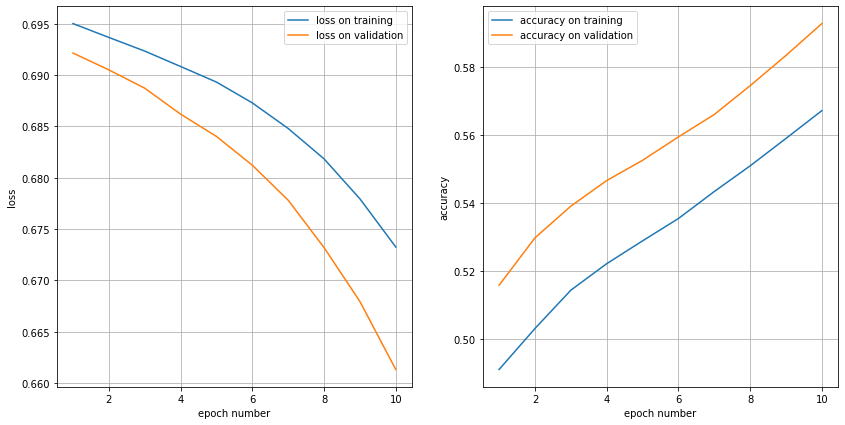

Epoch: 10 | Epoch Time: 1m 6s
	Train Loss: 0.673 | Train Acc: 56.72%
	 Val. Loss: 0.661 |  Val. Acc: 59.27%


In [185]:
N_EPOCHS = 10

best_valid_loss = float('inf')

train_loss_history = []
valid_loss_history = []

train_acc_history = []
valid_acc_history = []

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model,elmo, train_data, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model,elmo, dev_data, criterion)
    
    train_loss_history.append(np.mean(train_loss))
    train_acc_history.append(np.mean(train_acc))
    valid_loss_history.append(np.mean(valid_loss))
    valid_acc_history.append(np.mean(valid_acc))
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss[-1] < best_valid_loss:
        best_valid_loss = valid_loss[-1]
        torch.save(model.state_dict(), 'bilstm-model.pt')

    clear_output(True)
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.plot(np.arange(len(train_loss_history)) + 1, train_loss_history, label='loss on training')
    plt.plot(np.arange(len(valid_loss_history)) + 1, valid_loss_history, label='loss on validation')
    plt.ylabel('loss')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.plot(np.arange(len(train_acc_history)) + 1, train_acc_history, label='accuracy on training')
    plt.plot(np.arange(len(valid_acc_history)) + 1, valid_acc_history, label='accuracy on validation')
    plt.ylabel('accuracy')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()
    plt.show()

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {np.mean(train_loss):.3f} | Train Acc: {np.mean(train_acc)*100:.2f}%')
    print(f'\t Val. Loss: {np.mean(valid_loss):.3f} |  Val. Acc: {np.mean(valid_acc)*100:.2f}%')

In [0]:
test_dataloader=DataLoader(test_texts_tok,batch_size=256,shuffle=False)
train_dataloader_pred =DataLoader(train_texts_tok,batch_size=256,shuffle=False)
dev_dataloader=DataLoader(dev_texts_tok,batch_size=256,shuffle=False)
dev_b_dataloader=DataLoader(dev_b_texts_tok,batch_size=256,shuffle=False)

In [0]:
preds_train = predict(model,elmo,train_dataloader_pred)
preds_dev = predict(model,elmo,dev_dataloader)
preds_dev_b = predict(model,elmo,dev_b_dataloader)

In [212]:
accuracy_score(y_train,preds_train)

0.6777333333333333

In [213]:
accuracy_score(y_dev,preds_dev)

0.4994

In [214]:
accuracy_score(y_dev_b,preds_dev_b)

0.5025

## **I don't have enough time for it because I don't train more epoches. That's why I set more epoches in file.py.**